In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set()
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it

In [3]:
electiondata_df = pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [4]:
electiondata_df_copy = pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [5]:
electiondata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [6]:
electiondata_df.shape

(1525, 9)

In [7]:
electiondata_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
electiondata_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [9]:
electiondata_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
electiondata_df.duplicated().sum()

8

In [11]:
electiondata_df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [12]:
replace = {
    "gender":{"male":1 , "female":0},
    "vote":{ "Conservative":1, "Labour":0}}

In [13]:
electiondata_df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [14]:
electiondata_df = electiondata_df.replace(replace)

In [15]:
electiondata_df['gender'].value_counts()

0    812
1    713
Name: gender, dtype: int64

In [16]:
electiondata_df['vote'].value_counts()

0    1063
1     462
Name: vote, dtype: int64

In [17]:
data = electiondata_df[electiondata_df.duplicated()]

In [18]:
electiondata_df.duplicated().sum()

8

In [167]:
data

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,0,35,4,4,5,2,3,2,1
627,0,39,3,4,4,2,5,2,1
871,0,38,2,4,2,2,4,3,1
984,1,74,4,3,2,4,8,2,0
1155,1,53,3,4,2,2,6,0,0
1237,0,36,3,3,2,2,6,2,0
1245,0,29,4,4,4,2,2,2,0
1439,0,40,4,3,4,2,2,2,1


In [19]:
electiondata_df.dtypes

vote                       int64
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                     int64
dtype: object

In [169]:
electiondata_df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [20]:
electiondata_df.drop_duplicates(inplace=True)

In [21]:
electiondata_df.duplicated().sum()

0

In [22]:
electiondata_df.skew()

vote                       0.857014
age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
gender                     0.130929
dtype: float64

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers

#### Univariate Analysis

#### Box Plots

In [23]:
electiondata_df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

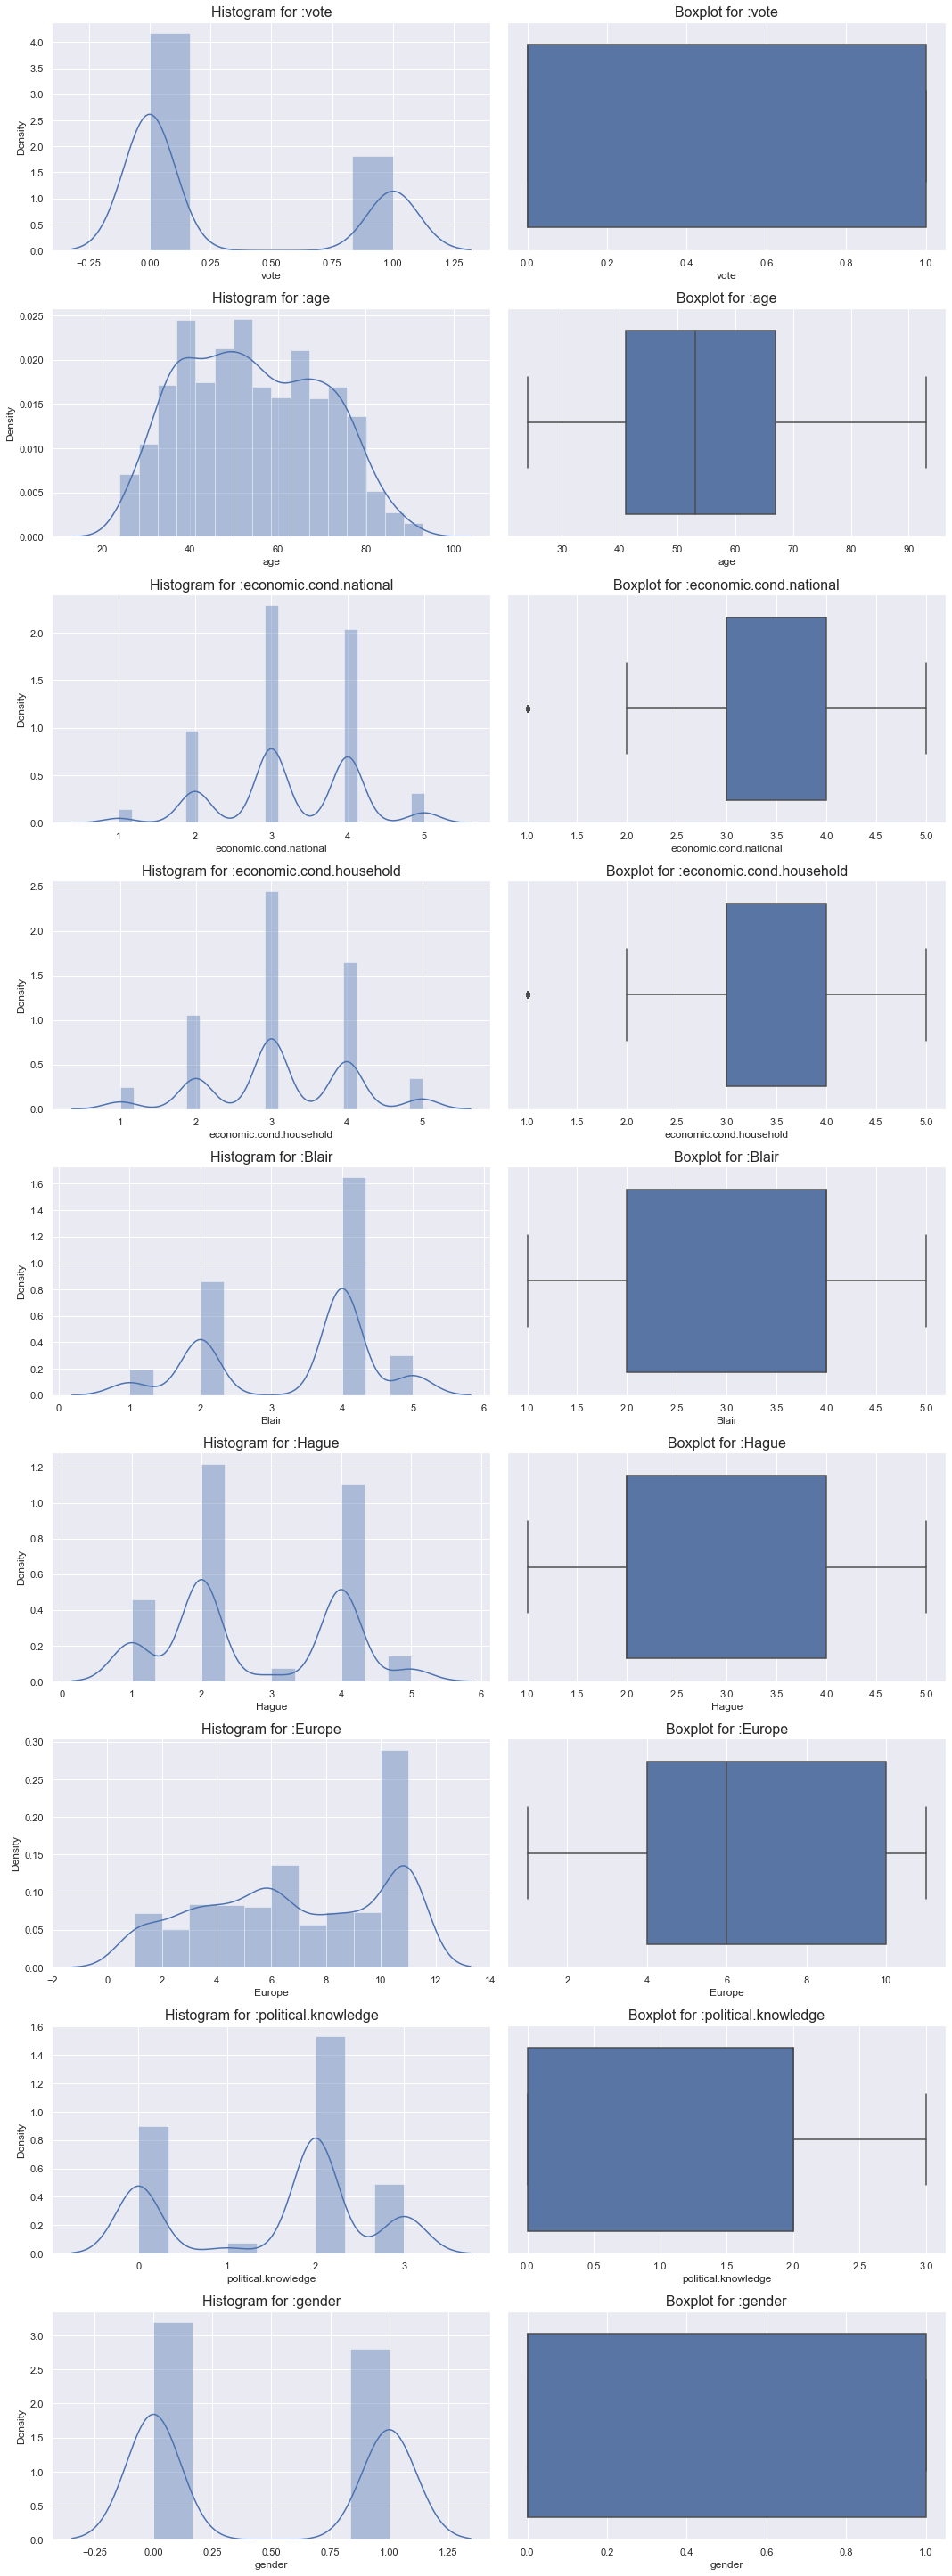

In [28]:
a=1
plt.figure(figsize=(15,80))
for i in electiondata_df.columns :
    if electiondata_df[i].dtypes != 'object':
        plt.subplot(18,2,a)
        sns.distplot(electiondata_df[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(18,2,a+1)
        sns.boxplot(electiondata_df[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

Text(34.05647152777779, 0.5, 'Count of Votes')

<Figure size 864x576 with 0 Axes>

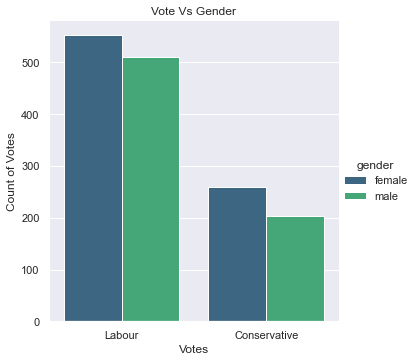

In [41]:
plt.figure(figsize=(12,8))
sns.catplot(x="vote", hue="gender", kind="count", data=electiondata_df_copy, palette='viridis')
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes')

#### Bivariate analysis

<Figure size 1440x1440 with 0 Axes>

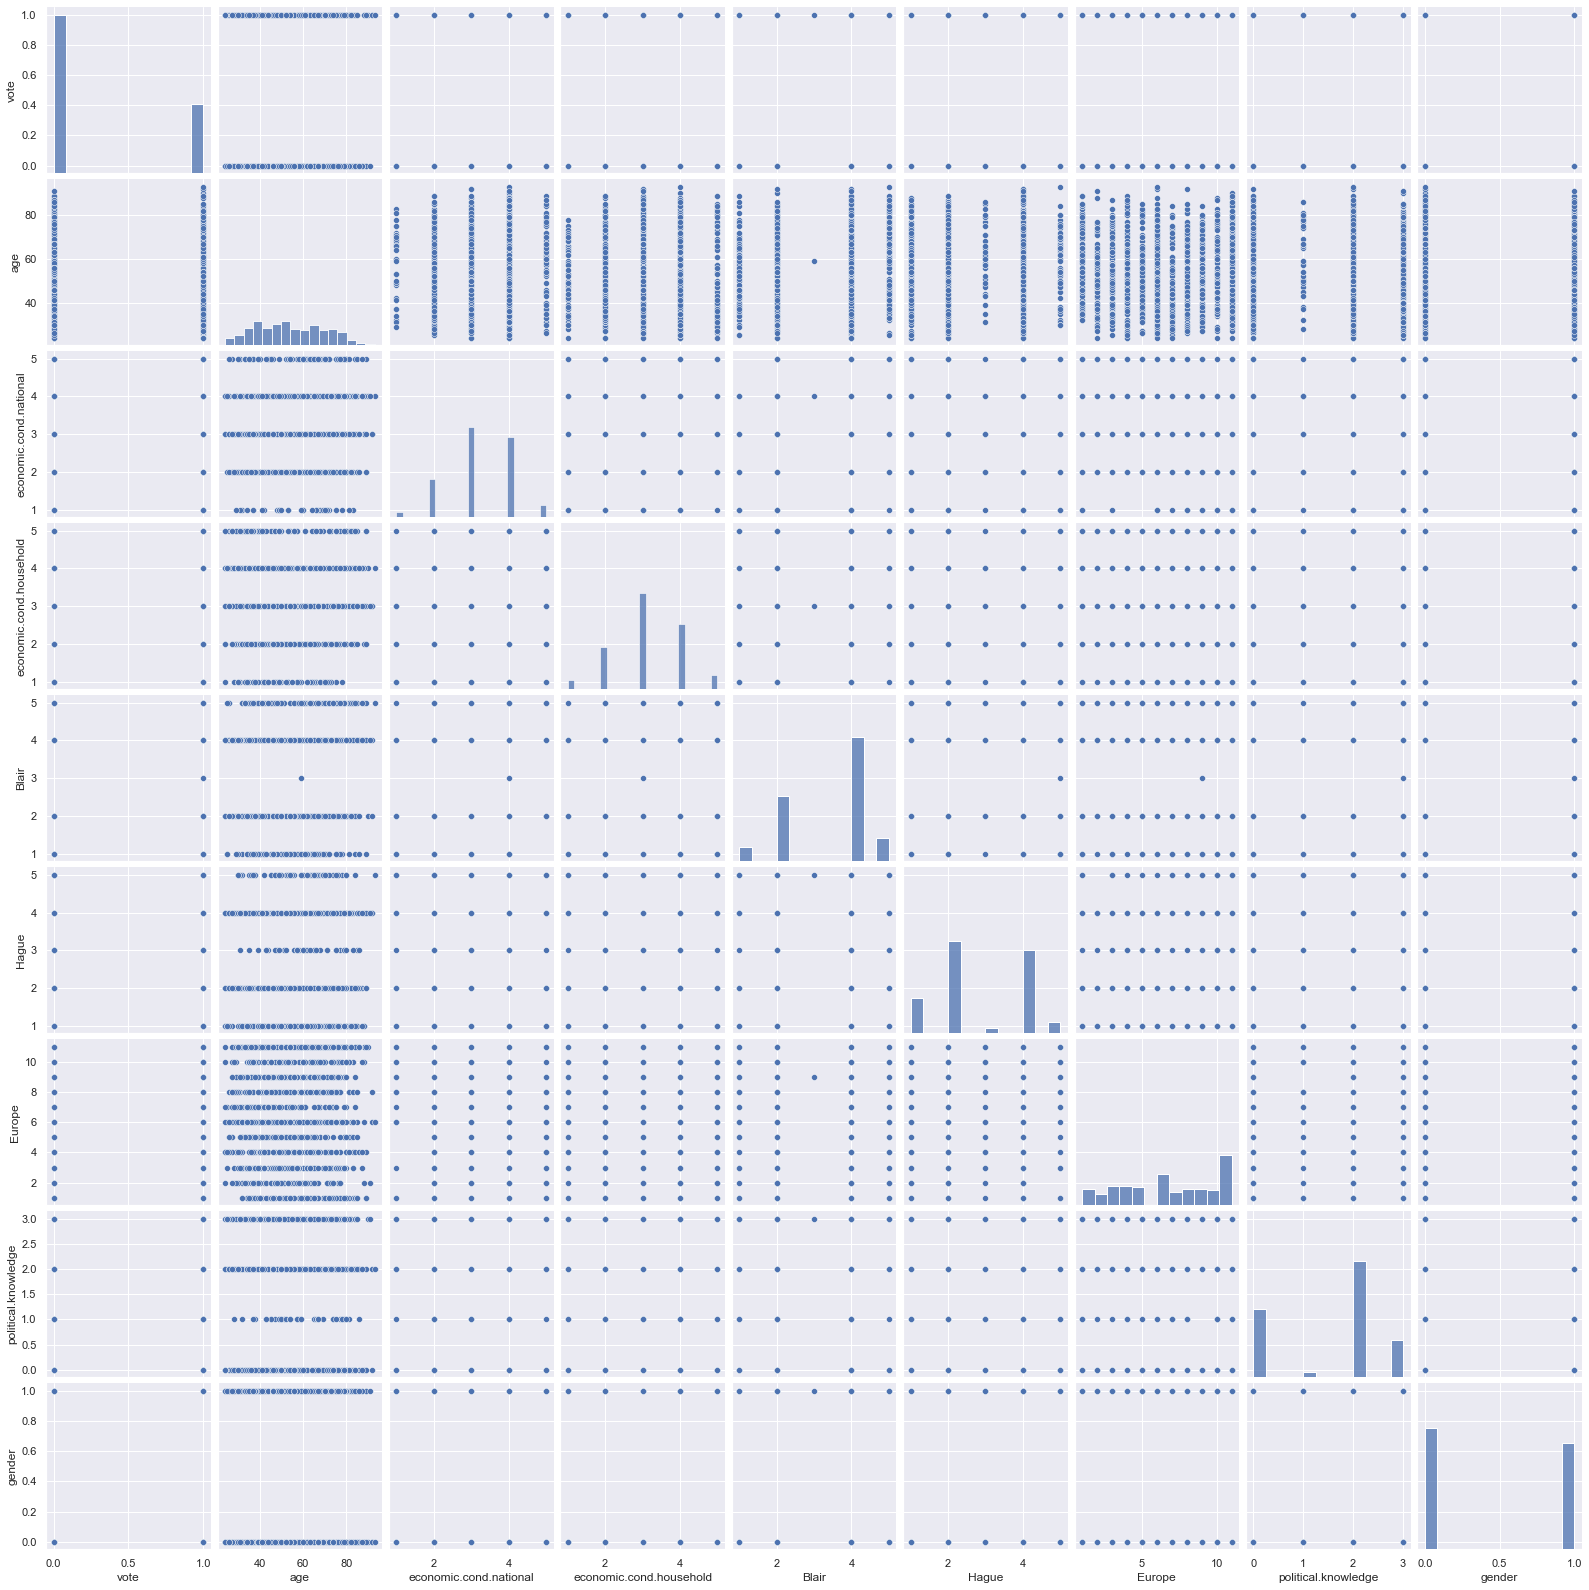

In [45]:
plt.figure(figsize=(20,20))
sns.pairplot(electiondata_df)

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='economic.cond.household', ylabel='age'>

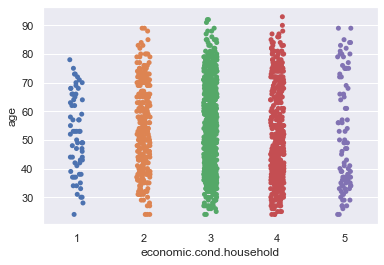

In [63]:
sns.stripplot(electiondata_df["economic.cond.household"],electiondata_df["age"])

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='economic.cond.national', ylabel='age'>

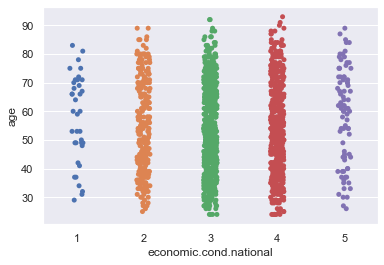

In [61]:
sns.stripplot(electiondata_df["economic.cond.national"],electiondata_df["age"])

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='political.knowledge', ylabel='age'>

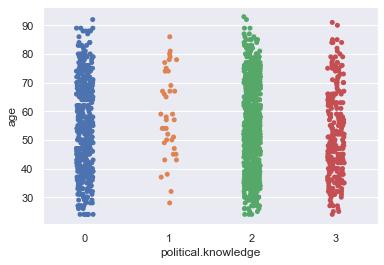

In [58]:
sns.stripplot(electiondata_df["political.knowledge"],electiondata_df["age"])

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Europe', ylabel='age'>

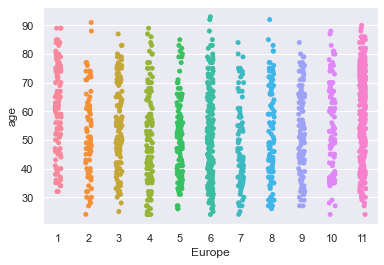

In [56]:
sns.stripplot(electiondata_df["Europe"],electiondata_df["age"])

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Blair', ylabel='age'>

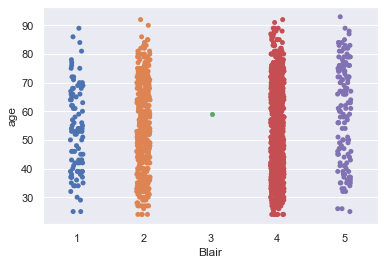

In [52]:
sns.stripplot(electiondata_df["Blair"],electiondata_df["age"])

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hague', ylabel='age'>

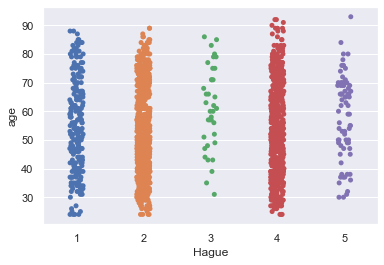

In [81]:
sns.stripplot(electiondata_df["Hague"],electiondata_df["age"])

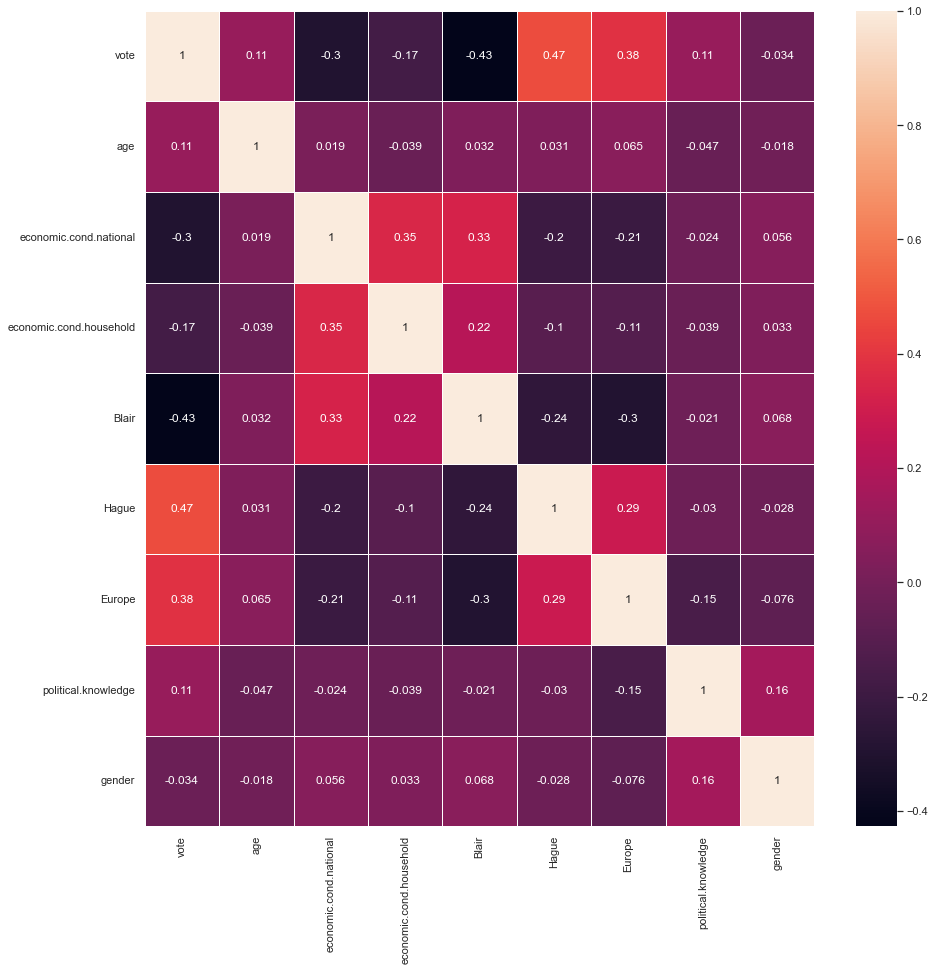

In [84]:
fig = plt.subplots(figsize=(15,15)) 
dataplot = sns.heatmap(electiondata_df.corr(), annot=True,linewidth = 1)

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
mm = MinMaxScaler()

In [26]:
df_new_mm = pd.DataFrame(mm.fit_transform(electiondata_df), columns=electiondata_df.columns)

In [27]:
df_new_mm.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,0.0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,0.0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,0.0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,0.0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


<AxesSubplot:>

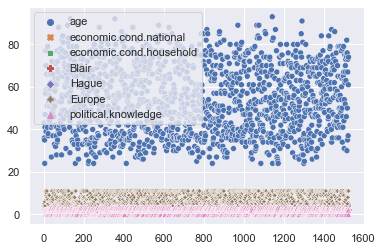

In [28]:
sns.scatterplot(data = electiondata_df_copy, color="red")

<AxesSubplot:>

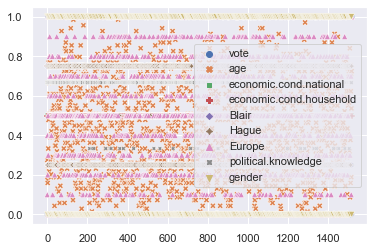

In [29]:
sns.scatterplot(data = df_new_mm, color="red")

In [30]:
df_new_mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   float64
 1   age                      1517 non-null   float64
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   float64
 5   Hague                    1517 non-null   float64
 6   Europe                   1517 non-null   float64
 7   political.knowledge      1517 non-null   float64
 8   gender                   1517 non-null   float64
dtypes: float64(9)
memory usage: 106.8 KB


In [31]:
df_new_mm = pd.get_dummies(df_new_mm, columns = {'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge'})

C:\Users\rakes\AppData\Local\Temp\ipykernel_11868\1165801462.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_new_mm = pd.get_dummies(df_new_mm, columns = {'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge'})


In [32]:
df_new_mm.head()

,vote,age,gender,Europe_0.0,Europe_0.1,Europe_0.20000000000000004,Europe_0.30000000000000004,Europe_0.4,Europe_0.5000000000000001,Europe_0.6000000000000001,...,Hague_1.0,Blair_0.0,Blair_0.25,Blair_0.5,Blair_0.75,Blair_1.0,political.knowledge_0.0,political.knowledge_0.3333333333333333,political.knowledge_0.6666666666666666,political.knowledge_1.0
0,0.0,0.275362,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.173913,1.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.0,0.159420,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.0,0.000000,0.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0.0,0.246377,1.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = df_new_mm.drop("vote",axis = 1)
y = df_new_mm.pop("vote")

In [35]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

In [36]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (1061, 37)
x_test (456, 37)
y_train (1061,)
y_test (456,)


## Modelling the data
### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(solver='newton-cg',max_iter=1000,random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='newton-cg')

In [39]:
y_train_predict=model.predict(x_train)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       754
         1.0       0.76      0.68      0.72       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



AxesSubplot(0.125,0.125;0.62x0.755)


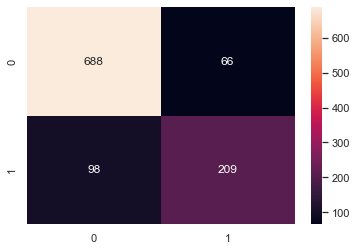

In [191]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

In [42]:
y_test_predict=model.predict(x_test)

AxesSubplot(0.125,0.125;0.62x0.755)


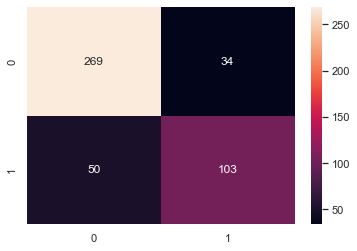

In [43]:
print(sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True , fmt="2g"))

In [44]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       303
         1.0       0.75      0.67      0.71       153

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.81      0.82      0.81       456



In [45]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.15457115928369464


In [46]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test_predict, y_test))

0.18421052631578946


In [47]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.906


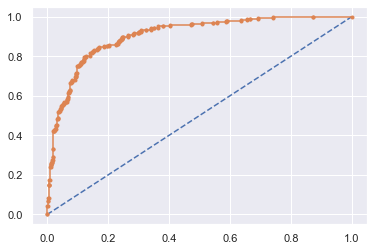

In [199]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.876


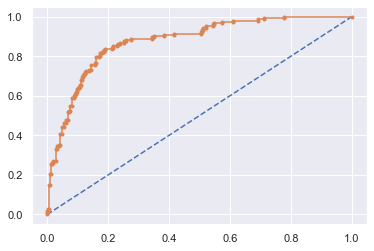

In [200]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Linear Discriminant Analysis

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
lda_model = LinearDiscriminantAnalysis()

In [50]:
lda = lda_model.fit(x_train,y_train)

In [51]:
lda_y_train_predict = lda.predict(x_train)

In [52]:
print(confusion_matrix(lda_y_train_predict,y_train))
print(classification_report(lda_y_train_predict,y_train))

[[680  91]
 [ 74 216]]
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       771
         1.0       0.70      0.74      0.72       290

    accuracy                           0.84      1061
   macro avg       0.80      0.81      0.81      1061
weighted avg       0.85      0.84      0.85      1061



AxesSubplot(0.125,0.125;0.62x0.755)


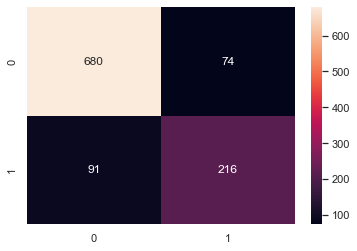

In [211]:
print(sns.heatmap(confusion_matrix(y_train,lda_y_train_predict),annot=True , fmt="2g"))

In [53]:
lda_y_test_predict = lda.predict(x_test)

In [54]:
print(confusion_matrix(lda_y_test_predict,y_test))
print(classification_report(lda_y_test_predict,y_test))

[[267  46]
 [ 36 107]]
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       313
         1.0       0.70      0.75      0.72       143

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.79       456
weighted avg       0.82      0.82      0.82       456



AxesSubplot(0.125,0.125;0.62x0.755)


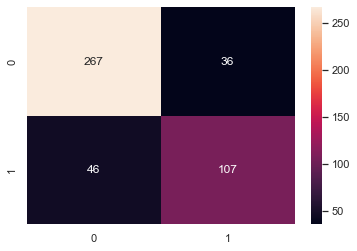

In [212]:
print(sns.heatmap(confusion_matrix(y_test,lda_y_test_predict),annot=True , fmt="2g"))

In [213]:
print(mean_squared_error(lda_y_train_predict, y_train))

0.15551366635249764


In [214]:
print(mean_squared_error(lda_y_test_predict, y_test))

0.17982456140350878


AUC: 0.902


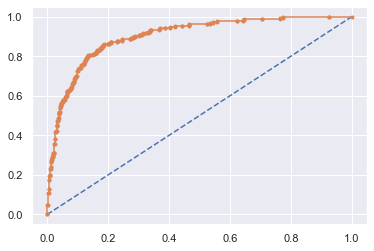

In [215]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.877


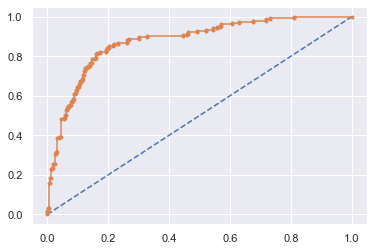

In [216]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

#### KNN Model

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors = 11)

In [57]:
knn = knn.fit(x_train,y_train)

In [58]:
knn_train_predict = knn.predict(x_train)
knn.score(x_train,y_train)

0.8463713477851084

In [59]:
knn_test_predict = knn.predict(x_test)
knn.score(x_test,y_test)

0.8223684210526315

In [60]:
print(classification_report(knn_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       791
         1.0       0.67      0.77      0.72       270

    accuracy                           0.85      1061
   macro avg       0.80      0.82      0.81      1061
weighted avg       0.85      0.85      0.85      1061



AxesSubplot(0.125,0.125;0.62x0.755)


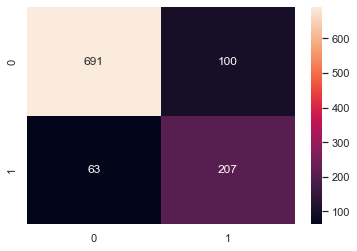

In [61]:
print(sns.heatmap(confusion_matrix(knn_train_predict,y_train),annot=True , fmt="2g"))

In [62]:
print(classification_report(knn_test_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       332
         1.0       0.64      0.79      0.71       124

    accuracy                           0.82       456
   macro avg       0.78      0.81      0.79       456
weighted avg       0.84      0.82      0.83       456



AxesSubplot(0.125,0.125;0.62x0.755)


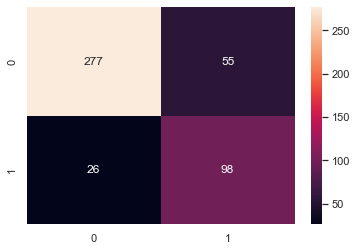

In [63]:
print(sns.heatmap(confusion_matrix(knn_test_predict,y_test),annot=True , fmt="2g"))

AUC: 0.910


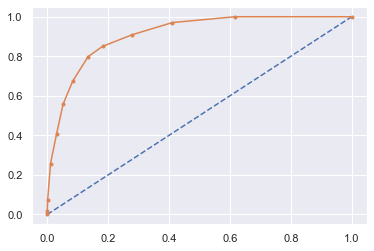

In [287]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.864


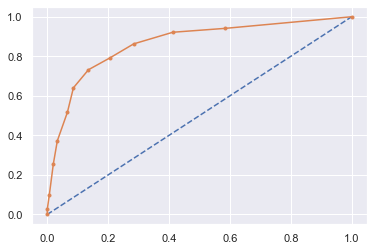

In [288]:
# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [64]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2543859649122807,
 0.19956140350877194,
 0.1864035087719298,
 0.1842105263157895,
 0.1864035087719298,
 0.17763157894736847,
 0.17763157894736847,
 0.1907894736842105,
 0.1907894736842105,
 0.1907894736842105,
 0.19298245614035092,
 0.19517543859649122,
 0.20394736842105265,
 0.19736842105263153,
 0.20394736842105265]

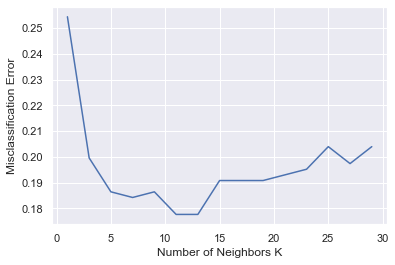

In [65]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
nb=GaussianNB()

In [68]:
nb= nb.fit(x_train, y_train)

In [69]:
nb_predict_train = nb.predict(x_train)

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83       634
         1.0       0.81      0.58      0.68       427

    accuracy                           0.78      1061
   macro avg       0.79      0.74      0.75      1061
weighted avg       0.78      0.78      0.77      1061

AxesSubplot(0.125,0.125;0.62x0.755)


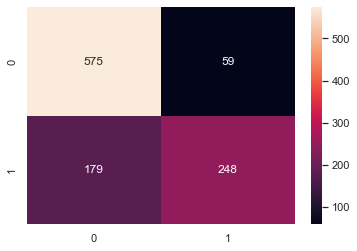

In [70]:
print(classification_report(nb_predict_train,y_train))
print(sns.heatmap(confusion_matrix(nb_predict_train,y_train),annot=True , fmt="2g"))

In [71]:
nb_predict_test = nb.predict(x_test)

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       260
         1.0       0.79      0.62      0.69       196

    accuracy                           0.77       456
   macro avg       0.77      0.75      0.75       456
weighted avg       0.77      0.77      0.76       456

AxesSubplot(0.125,0.125;0.62x0.755)


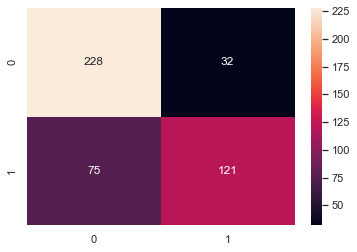

In [72]:
print(classification_report(nb_predict_test,y_test))
print(sns.heatmap(confusion_matrix(nb_predict_test,y_test),annot=True , fmt="2g"))

AUC: 0.856


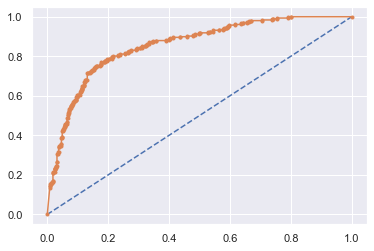

In [73]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.842


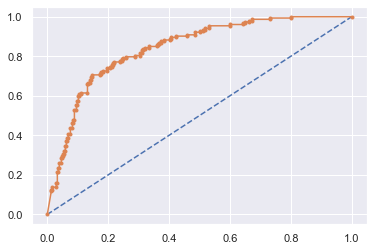

In [74]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

#### Tuning

In [75]:
# Tuning using Grid Search for LR

Param_grid = {'max_iter': [500,1000,2000],
             'penalty' : ['l1','l2'],
             'solver' : ['newton-cg','sag','liblinear','lbfgs','saga'],
             'C' : [0.5,0.8,1.0]}
Grid_search_LR = GridSearchCV(LogisticRegression(random_state=1),param_grid=Param_grid,cv=5)
Grid_search_LR.fit(x_train,y_train)
Model_LR = Grid_search_LR.best_estimator_
print(Grid_search_LR.best_params_)
print('Grid_search_LR: Score_Train', Model_LR.score(x_train,y_train),
      'Grid_search_LR: Score_Test',Model_LR.score(x_test,y_test))

{'C': 0.5, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}
Grid_search_LR: Score_Train 0.8491988689915174 Grid_search_LR: Score_Test 0.8135964912280702


C:\Users\rakes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rakes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rakes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rakes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

In [293]:
# Tuning using Grid Search for LDA

Param_grid = {'tol': [0.001,0.0001,0.0001],
             'solver' : ['svd', 'lsqr', 'eigen']}
Grid_search_LDA = GridSearchCV(LinearDiscriminantAnalysis(),param_grid=Param_grid,cv=5)
Grid_search_LDA.fit(x_train,y_train)
Model_LDA = Grid_search_LDA.best_estimator_
print(Grid_search_LDA.best_params_)
print('Grid_search_LDA: Score_Train', Model_LDA.score(x_train,y_train),
      'Grid_search_LDA: Score_Test',Model_LDA.score(x_test,y_test))

{'solver': 'svd', 'tol': 0.001}
Grid_search_LDA: Score_Train 0.8444863336475024 Grid_search_LDA: Score_Test 0.8201754385964912


C:\Users\rakes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rakes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rakes\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 605, in fit
    self._solve_eigen(
  File "C:\Users\rakes\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 445, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "C:\Users\rakes\anaconda3\l

In [295]:
# Tuning using Grid Search for KNN

Param_grid = {'n_neighbors': [11,12],              
             'weights' : ['uniform','distance'],
             'p' : [1,2],
             'algorithm' : ['ball_tree', 'kd_tree', 'brute']            
         }
Grid_search_KNN = GridSearchCV(KNeighborsClassifier(),param_grid=Param_grid,cv=5)
Grid_search_KNN.fit(x_train,y_train)
Model_KNN = Grid_search_KNN.best_estimator_
print(Grid_search_KNN.best_params_)
print('Grid_search_KNN: Score_Train', Model_KNN.score(x_train,y_train),
      'Grid_search_KNN: Score_Test',Model_KNN.score(x_test,y_test))

{'algorithm': 'ball_tree', 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
Grid_search_KNN: Score_Train 0.8463713477851084 Grid_search_KNN: Score_Test 0.8135964912280702


#### Bagging

In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix,log_loss,f1_score,balanced_accuracy_score
from sklearn.model_selection import cross_val_score,KFold

In [78]:
Bag_Model = BaggingClassifier(base_estimator=RandomForestClassifier(),random_state=1)
Bag_Model.fit(x_train,y_train)

print('Accuracy Score - Train:',Bag_Model.score(x_train,y_train))
print('Accuracy Score - Test:',Bag_Model.score(x_test,y_test))

Accuracy Score - Train: 0.9670122525918945
Accuracy Score - Test: 0.8114035087719298


In [79]:
Model_RF = RandomForestClassifier(random_state=1).fit(x_train,y_train)
print('Accuracy Score - Train:',Model_RF.score(x_train,y_train))
print('Accuracy Score - Test:',Model_RF.score(x_test,y_test))

Accuracy Score - Train: 1.0
Accuracy Score - Test: 0.8157894736842105


In [80]:
param_grid = {
 'bootstrap': [True, False],
 'bootstrap_features': [True, False],    
 'n_estimators': [5,10,15],
 'base_estimator__bootstrap': [True, False],    
 'base_estimator__n_estimators': [10,20,30]
}

In [81]:
grid_search=GridSearchCV(BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1,
                                                                                 max_depth=5,
                                                                                min_samples_leaf=15,
                                                                                min_samples_split=45)), 
                         param_grid=param_grid, cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
Model_Bagging= grid_search.best_estimator_
print(grid_search.best_params_)
print('Grid Search Bagging: Accuracy Score - Train:',Model_Bagging.score(x_train,y_train))
print('Grid Search Bagging: Accuracy Score - Test:',Model_Bagging.score(x_test,y_test))

{'base_estimator__bootstrap': False, 'base_estimator__n_estimators': 20, 'bootstrap': False, 'bootstrap_features': False, 'n_estimators': 15}
Grid Search Bagging: Accuracy Score - Train: 0.8105560791705938
Grid Search Bagging: Accuracy Score - Test: 0.7807017543859649


AUC: 0.996


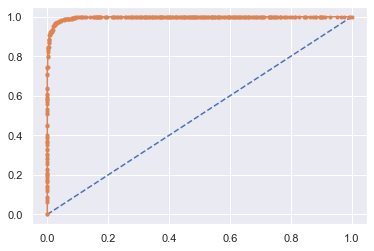

In [321]:
# AUC and ROC for the training data

# predict probabilities
probs = Bag_Model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.896


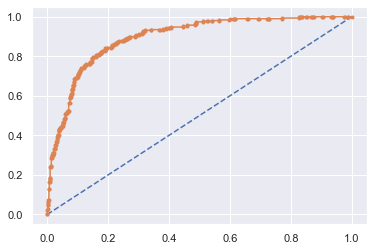

In [322]:
# AUC and ROC for the training data

# predict probabilities
probs = Model_Bagging.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       777
         1.0       0.91      0.98      0.94       284

    accuracy                           0.97      1061
   macro avg       0.95      0.97      0.96      1061
weighted avg       0.97      0.97      0.97      1061

AxesSubplot(0.125,0.125;0.62x0.755)


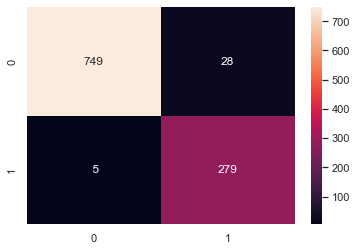

In [341]:
y_train_bagging_predict = Bag_Model.predict(x_train)
print(classification_report(y_train_bagging_predict,y_train))
print(sns.heatmap(confusion_matrix(y_train_bagging_predict,y_train),annot=True , fmt="2g"))

              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87       877
         1.0       0.47      0.78      0.58       184

    accuracy                           0.81      1061
   macro avg       0.71      0.80      0.73      1061
weighted avg       0.86      0.81      0.82      1061

AxesSubplot(0.125,0.125;0.62x0.755)


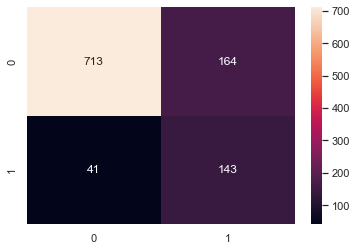

In [342]:
y_train_bagging_predict = Model_Bagging.predict(x_train)
print(classification_report(y_train_bagging_predict,y_train))
print(sns.heatmap(confusion_matrix(y_train_bagging_predict,y_train),annot=True , fmt="2g"))

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87       326
         1.0       0.67      0.78      0.72       130

    accuracy                           0.83       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.84      0.83      0.83       456

AxesSubplot(0.125,0.125;0.62x0.755)


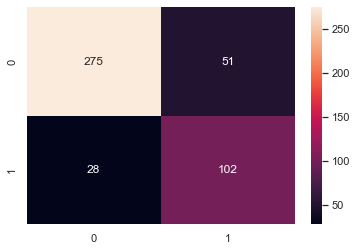

In [343]:
y_test_bagging_predict = Bag_Model.predict(x_test)
print(classification_report(y_test_bagging_predict,y_test))
print(sns.heatmap(confusion_matrix(y_test_bagging_predict,y_test),annot=True , fmt="2g"))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85       364
         1.0       0.48      0.79      0.60        92

    accuracy                           0.78       456
   macro avg       0.71      0.79      0.72       456
weighted avg       0.84      0.78      0.80       456

AxesSubplot(0.125,0.125;0.62x0.755)


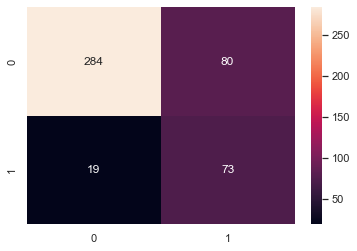

In [344]:
y_test_bagging_predict = Model_Bagging.predict(x_test)
print(classification_report(y_test_bagging_predict,y_test))
print(sns.heatmap(confusion_matrix(y_test_bagging_predict,y_test),annot=True , fmt="2g"))

#### Boosting
##### Ada Boosting

In [82]:
n_estimators = [5,10,20,30] #60,100
k_folds = KFold(n_splits=10)

for i in n_estimators:
    Model_ada_boost = AdaBoostClassifier(n_estimators=i,random_state=1)
    Model_ada_boost.fit(x_train, y_train)
    results = cross_val_score(Model_ada_boost, x_test, y_test, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 5 estimators:
0.7630434782608695
Results for 10 estimators:
0.8027053140096617
Results for 20 estimators:
0.7915942028985506
Results for 30 estimators:
0.7828985507246377


AUC: 0.909


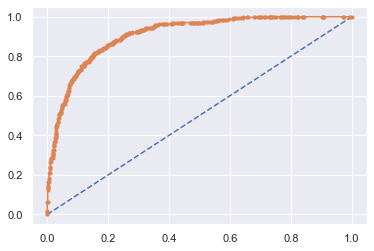

In [328]:
# AUC and ROC for the training data

# predict probabilities
probs = Model_ada_boost.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       783
         1.0       0.69      0.77      0.73       278

    accuracy                           0.85      1061
   macro avg       0.80      0.82      0.81      1061
weighted avg       0.86      0.85      0.85      1061

AxesSubplot(0.125,0.125;0.62x0.755)


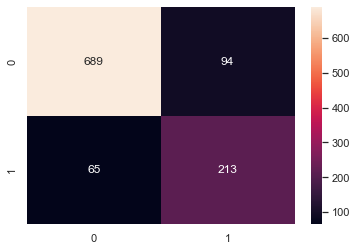

In [345]:
y_train_boosting_predict = Model_ada_boost.predict(x_train)
print(classification_report(y_train_boosting_predict,y_train))
print(sns.heatmap(confusion_matrix(y_train_boosting_predict,y_train),annot=True , fmt="2g"))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       322
         1.0       0.67      0.77      0.72       134

    accuracy                           0.82       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.83      0.82      0.83       456

AxesSubplot(0.125,0.125;0.62x0.755)


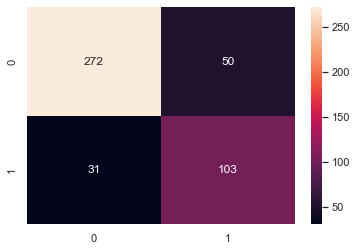

In [346]:
y_test_boosting_predict = Model_ada_boost.predict(x_test)
print(classification_report(y_test_boosting_predict,y_test))
print(sns.heatmap(confusion_matrix(y_test_boosting_predict,y_test),annot=True , fmt="2g"))

In [334]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid)
Model_ada_boost.fit(x_train,y_train)
print('Grid Search Ada_Boosting: Accuracy Score - Train:',Model_ada_boost.score(x_train,y_train))
print('Grid Search Ada_Boosting: Accuracy Score - Test:',Model_ada_boost.score(x_test,y_test))

Grid Search Ada_Boosting: Accuracy Score - Train: 0.8501413760603205
Grid Search Ada_Boosting: Accuracy Score - Test: 0.8223684210526315


AUC: 0.909


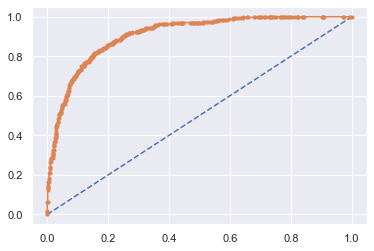

In [335]:
# AUC and ROC for the training data

# predict probabilities
probs = Model_ada_boost.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

##### Gradient Boosting

In [83]:
n_estimators = [10,20,30,50,100,150,200]
k_folds = KFold(n_splits=10)

for i in n_estimators:
    Model_G_boost = GradientBoostingClassifier(n_estimators=i,random_state=1)
    Model_G_boost.fit(x_train, y_train)
    results = cross_val_score(Model_G_boost, x_test, y_test, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 10 estimators:
0.7805797101449274
Results for 20 estimators:
0.7914492753623188
Results for 30 estimators:
0.7914975845410628
Results for 50 estimators:
0.7958454106280193
Results for 100 estimators:
0.7827536231884057
Results for 150 estimators:
0.7674396135265701
Results for 200 estimators:
0.7741062801932367


AUC: 0.932


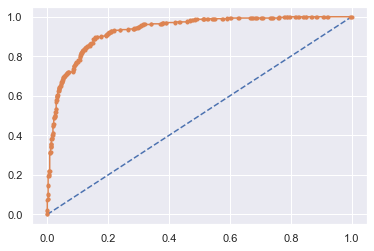

In [337]:
# AUC and ROC for the training data

# predict probabilities
probs = Model_G_boost.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [84]:
parameters = {
    "learning_rate": [0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[20,30,50]
    }

Grid_search_GBoost = GridSearchCV(GradientBoostingClassifier(),param_grid=parameters,cv=5, n_jobs=-1)
Grid_search_GBoost = Grid_search_GBoost.fit(x_train,y_train)
print(Grid_search_GBoost.best_params_)
Model_G_boost = Grid_search_GBoost.best_estimator_
print("")
print('Grid Search G_Boosting: Accuracy Score - Train:',Model_G_boost.score(x_train,y_train))
print('Grid Search G_Boosting: Accuracy Score - Test:',Model_G_boost.score(x_test,y_test))

{'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}

Grid Search G_Boosting: Accuracy Score - Train: 0.882186616399623
Grid Search G_Boosting: Accuracy Score - Test: 0.8201754385964912


AUC: 0.937


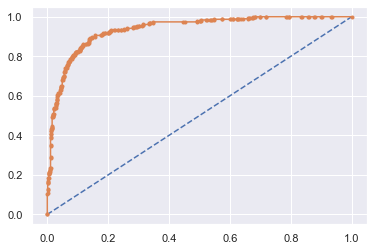

In [85]:
# AUC and ROC for the training data

# predict probabilities
probs = Grid_search_GBoost.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       781
         1.0       0.75      0.82      0.79       280

    accuracy                           0.88      1061
   macro avg       0.84      0.86      0.85      1061
weighted avg       0.89      0.88      0.88      1061

AxesSubplot(0.125,0.125;0.62x0.755)


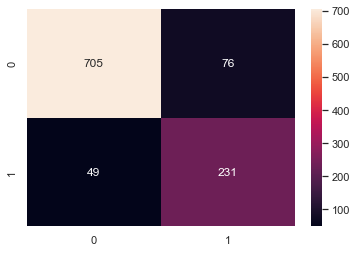

In [86]:
y_train_boosting_predict = Model_G_boost.predict(x_train)
print(classification_report(y_train_boosting_predict,y_train))
print(sns.heatmap(confusion_matrix(y_train_boosting_predict,y_train),annot=True , fmt="2g"))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       319
         1.0       0.68      0.76      0.72       137

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.79       456
weighted avg       0.83      0.82      0.82       456

AxesSubplot(0.125,0.125;0.62x0.755)


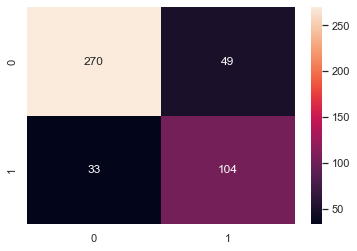

In [87]:
y_test_boosting_predict = Model_G_boost.predict(x_test)
print(classification_report(y_test_boosting_predict,y_test))
print(sns.heatmap(confusion_matrix(y_test_boosting_predict,y_test),annot=True , fmt="2g"))

In [ ]:
Grid_search_GBoost

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       791
         1.0       0.70      0.80      0.75       270

    accuracy                           0.86      1061
   macro avg       0.81      0.84      0.83      1061
weighted avg       0.87      0.86      0.86      1061

AxesSubplot(0.125,0.125;0.62x0.755)


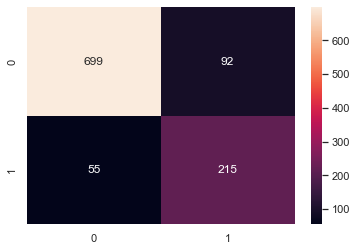

In [353]:
y_train_boosting_predict = Grid_search_GBoost.predict(x_train)
print(classification_report(y_train_boosting_predict,y_train))
print(sns.heatmap(confusion_matrix(y_train_boosting_predict,y_train),annot=True , fmt="2g"))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       324
         1.0       0.67      0.77      0.72       132

    accuracy                           0.82       456
   macro avg       0.78      0.81      0.79       456
weighted avg       0.83      0.82      0.83       456

AxesSubplot(0.125,0.125;0.62x0.755)


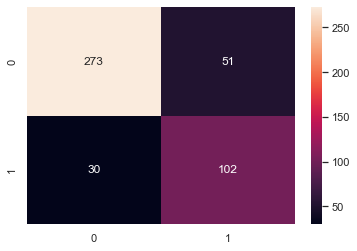

In [354]:
y_test_boosting_predict = Grid_search_GBoost.predict(x_test)
print(classification_report(y_test_boosting_predict,y_test))
print(sns.heatmap(confusion_matrix(y_test_boosting_predict,y_test),annot=True , fmt="2g"))

### 2.1 Find the number of characters, words, and sentences for the mentioned documents

In [1]:
import nltk
import pandas as pd
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt=inaugural.raw('1941-Roosevelt.txt')
Kennedy=inaugural.raw('1961-Kennedy.txt')
Nixon=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
numb_of_Char_Roosevelt = len(Roosevelt)
print('Number of characters in Roosevelt :',numb_of_Char_Roosevelt)
numb_of_Char_Kennedy = len(Kennedy)
print('Number of characters in Kennedy :',numb_of_Char_Kennedy)
numb_of_Char_Nixon = len(Nixon)
print('Number of characters in Nixon :',numb_of_Char_Nixon)

Number of characters in Roosevelt : 7571
Number of characters in Kennedy : 7618
Number of characters in Nixon : 9991


In [11]:
x = inaugural.raw('1941-Roosevelt.txt')
xwords = x.split()
print('Number of words in Roosevelt :',len(xwords))

Number of words in Roosevelt : 1360


In [12]:
y = inaugural.raw('1961-Kennedy.txt')
ywords = y.split()


In [13]:
z = inaugural.raw('1973-Nixon.txt')
zwords = z.split()
print('Number of words in Nixon :',len(words))

Number of words in Nixon : 1390


In [14]:
print('Number of words in Roosevelt :',len(xwords))
print('Number of words in Kennedy :',len(ywords))
print('Number of words in Nixon :',len(zwords))

Number of words in Roosevelt : 1360
Number of words in Kennedy : 1390
Number of words in Nixon : 1819


In [15]:
y = pd.DataFrame({'Text':inaugural.raw('1941-Roosevelt.txt')}, index = [0])
y['sentences'] = y['Text'].apply(lambda x:len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
0,On each national day of inauguration since 178...,67


In [16]:
y = pd.DataFrame({'Text':inaugural.raw('1961-Kennedy.txt')}, index = [0])
y['sentences'] = y['Text'].apply(lambda x:len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52


In [17]:
y = pd.DataFrame({'Text':inaugural.raw('1973-Nixon.txt')}, index = [0])
y['sentences'] = y['Text'].apply(lambda x:len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


### 2.2 Remove all the stopwords from all three speeches

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

stop_words= set(stopwords.words('english'))
word_tokens = word_tokenize(Roosevelt)

filtered_sentence_R = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence_R.append(w)

print('witout removing stopwords',word_tokens)

print('stop words which got removed',set(word_tokens)-set(filtered_sentence_R))

print('After Removing all the stopwords from the speech',filtered_sentence_R)

print('number of words in Roosevelt :',len(filtered_sentence_R))

witout removing stopwords ['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what

In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

stop_words= set(stopwords.words('english'))
word_tokens = word_tokenize(Kennedy)

filtered_sentence_K = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence_K.append(w)

print('witout removing stopwords',word_tokens)

print('stop words which got removed',set(word_tokens)-set(filtered_sentence_K))

print('After Removing all the stopwords from the speech',filtered_sentence_K)

print('Number of words in Kennedy :',len(filtered_sentence_K))

witout removing stopwords ['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the',

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

stop_words= set(stopwords.words('english'))
word_tokens = word_tokenize(Nixon)

filtered_sentence_N = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence_N.append(w)

print('witout removing stopwords',word_tokens)

print('stop words which got removed',set(word_tokens)-set(filtered_sentence_N))

print('After Removing all the stopwords from the speech',filtered_sentence_N)

print('Number of words in Nixon :',len(filtered_sentence_N))

witout removing stopwords ['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 

### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [29]:
from nltk.probability import FreqDist

In [31]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Roosevelt)
set(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Nation', 12),
 ('Spirit', 9),
 ('Life', 9),
 ('Democracy', 9),
 ('America', 7),
 ('Years', 6),
 ('Freedom', 6),
 ('Human', 5),
 ('Body', 5),
 ('Mind', 5),
 ('Speaks', 5),
 ('Day', 4),
 ('States', 4),
 ('Government', 4),
 ('Faith', 4),
 ('United', 3),
 ('Task', 3),
 ('History', 3),
 ('Nations', 3),
 ('Live', 3),
 ('Future', 3),
 ('Free', 3),
 ('Continent', 3),
 ('Person', 3),
 ('World', 3),
 ('Sacred', 3),
 ('Destiny', 3),
 ('National', 2),
 ('1789', 2),
 ('Washington', 2),
 ('Create', 2),
 ('Disruption', 2),
 ('Time', 2),
 ('Midst', 2),
 ('Stock', 2),
 ('Lives', 2),
 ('Measure', 2),
 ('Doubt', 2),
 ('Measured', 2),
 ('Americans', 2),
 ('Republic', 2),
 ('Acted', 2),
 ('Security', 2),
 ('Things', 2),
 ('Present', 2),
 ('Built', 2),
 ('Maintained', 2),
 ('Constitution', 2),
 ('Freely', 2),
 ('American', 2),
 ('Enterprise', 2),
 ('Forms', 2),
 ('Hopes', 2),
 ('Find', 2),
 ('Early', 2),
 ('Peoples', 2),
 ('Written', 2),
 ('Land', 2),
 ('Forward', 2),
 ('Words', 2),
 ('Preservation', 2),

In [32]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
Kennedy_no_punc = tokenizer.tokenize(Kennedy)
set(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('World', 8),
 ('Sides', 8),
 ('Pledge', 7),
 ('Citizens', 5),
 ('Power', 5),
 ('Free', 5),
 ('Nations', 5),
 ('President', 4),
 ('Fellow', 4),
 ('Freedom', 4),
 ('Americans', 4),
 ('Peace', 4),
 ('Hope', 4),
 ('Arms', 4),
 ('Country', 4),
 ('Call', 4),
 ('Today', 3),
 ('God', 3),
 ('Human', 3),
 ('Poverty', 3),
 ('Life', 3),
 ('Globe', 3),
 ('Dare', 3),
 ('Generation', 3),
 ('Bear', 3),
 ('Control', 3),
 ('Join', 3),
 ('Begin', 3),
 ('Final', 3),
 ('Vice', 2),
 ('Mr', 2),
 ('Forebears', 2),
 ('Century', 2),
 ('Hands', 2),
 ('Forms', 2),
 ('Rights', 2),
 ('Hand', 2),
 ('Revolution', 2),
 ('Word', 2),
 ('Time', 2),
 ('Friend', 2),
 ('Foe', 2),
 ('Passed', 2),
 ('Nation', 2),
 ('Committed', 2),
 ('Burden', 2),
 ('Meet', 2),
 ('Support', 2),
 ('Oppose', 2),
 ('Assure', 2),
 ('Success', 2),
 ('Loyalty', 2),
 ('United', 2),
 ('Powerful', 2),
 ('States', 2),
 ('Welcome', 2),
 ('Tyranny', 2),
 ('Find', 2),
 ('Supporting', 2),
 ('Back', 2),
 ('Seek', 2),
 ('South', 2),
 ('Offer', 2),
 ('Deeds

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
Nixon_no_punc = tokenizer.tokenize(Nixon)
set(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('America', 21),
 ('Peace', 19),
 ('World', 18),
 ('Nation', 11),
 ('Responsibility', 11),
 ('Government', 10),
 ('Great', 9),
 ('Home', 9),
 ('Abroad', 8),
 ('Years', 7),
 ('Policies', 7),
 ('Role', 7),
 ('Make', 7),
 ('History', 7),
 ('Time', 6),
 ('Today', 5),
 ('Responsibilities', 5),
 ('Progress', 5),
 ('Respect', 5),
 ('Act', 5),
 ('Promise', 4),
 ('Long', 4),
 ('Work', 4),
 ('Freedom', 4),
 ('God', 4),
 ('Proud', 4),
 ('Faith', 4),
 ('Mr', 3),
 ('Country', 3),
 ('Share', 3),
 ('Resolve', 3),
 ('Retreat', 3),
 ('Greatly', 3),
 ('Century', 3),
 ('Nations', 3),
 ('Bold', 3),
 ('Future', 3),
 ('Forward', 3),
 ('Build', 3),
 ('Structure', 3),
 ('Live', 3),
 ('System', 3),
 ('Gladly', 3),
 ('Challenges', 3),
 ('Away', 3),
 ('Individual', 3),
 ('Ashamed', 3),
 ('Spirit', 2),
 ('Conflict', 2),
 ('Meet', 2),
 ('Stand', 2),
 ('Enter', 2),
 ('Leads', 2),
 ('Danger', 2),
 ('Renew', 2),
 ('Past', 2),
 ('Year', 2),
 ('Initiatives', 2),
 ('Wars', 2),
 ('Generations', 2),
 ('Important', 2),
 (

### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [34]:
pip install wordcloud

In [35]:
import re
from wordcloud import WordCloud , STOPWORDS

In [36]:
text = inaugural.raw('1941-Roosevelt.txt')
text = re.sub(r'==.*?==+, ', '', text)
text =text.replace('\n', '')

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off');

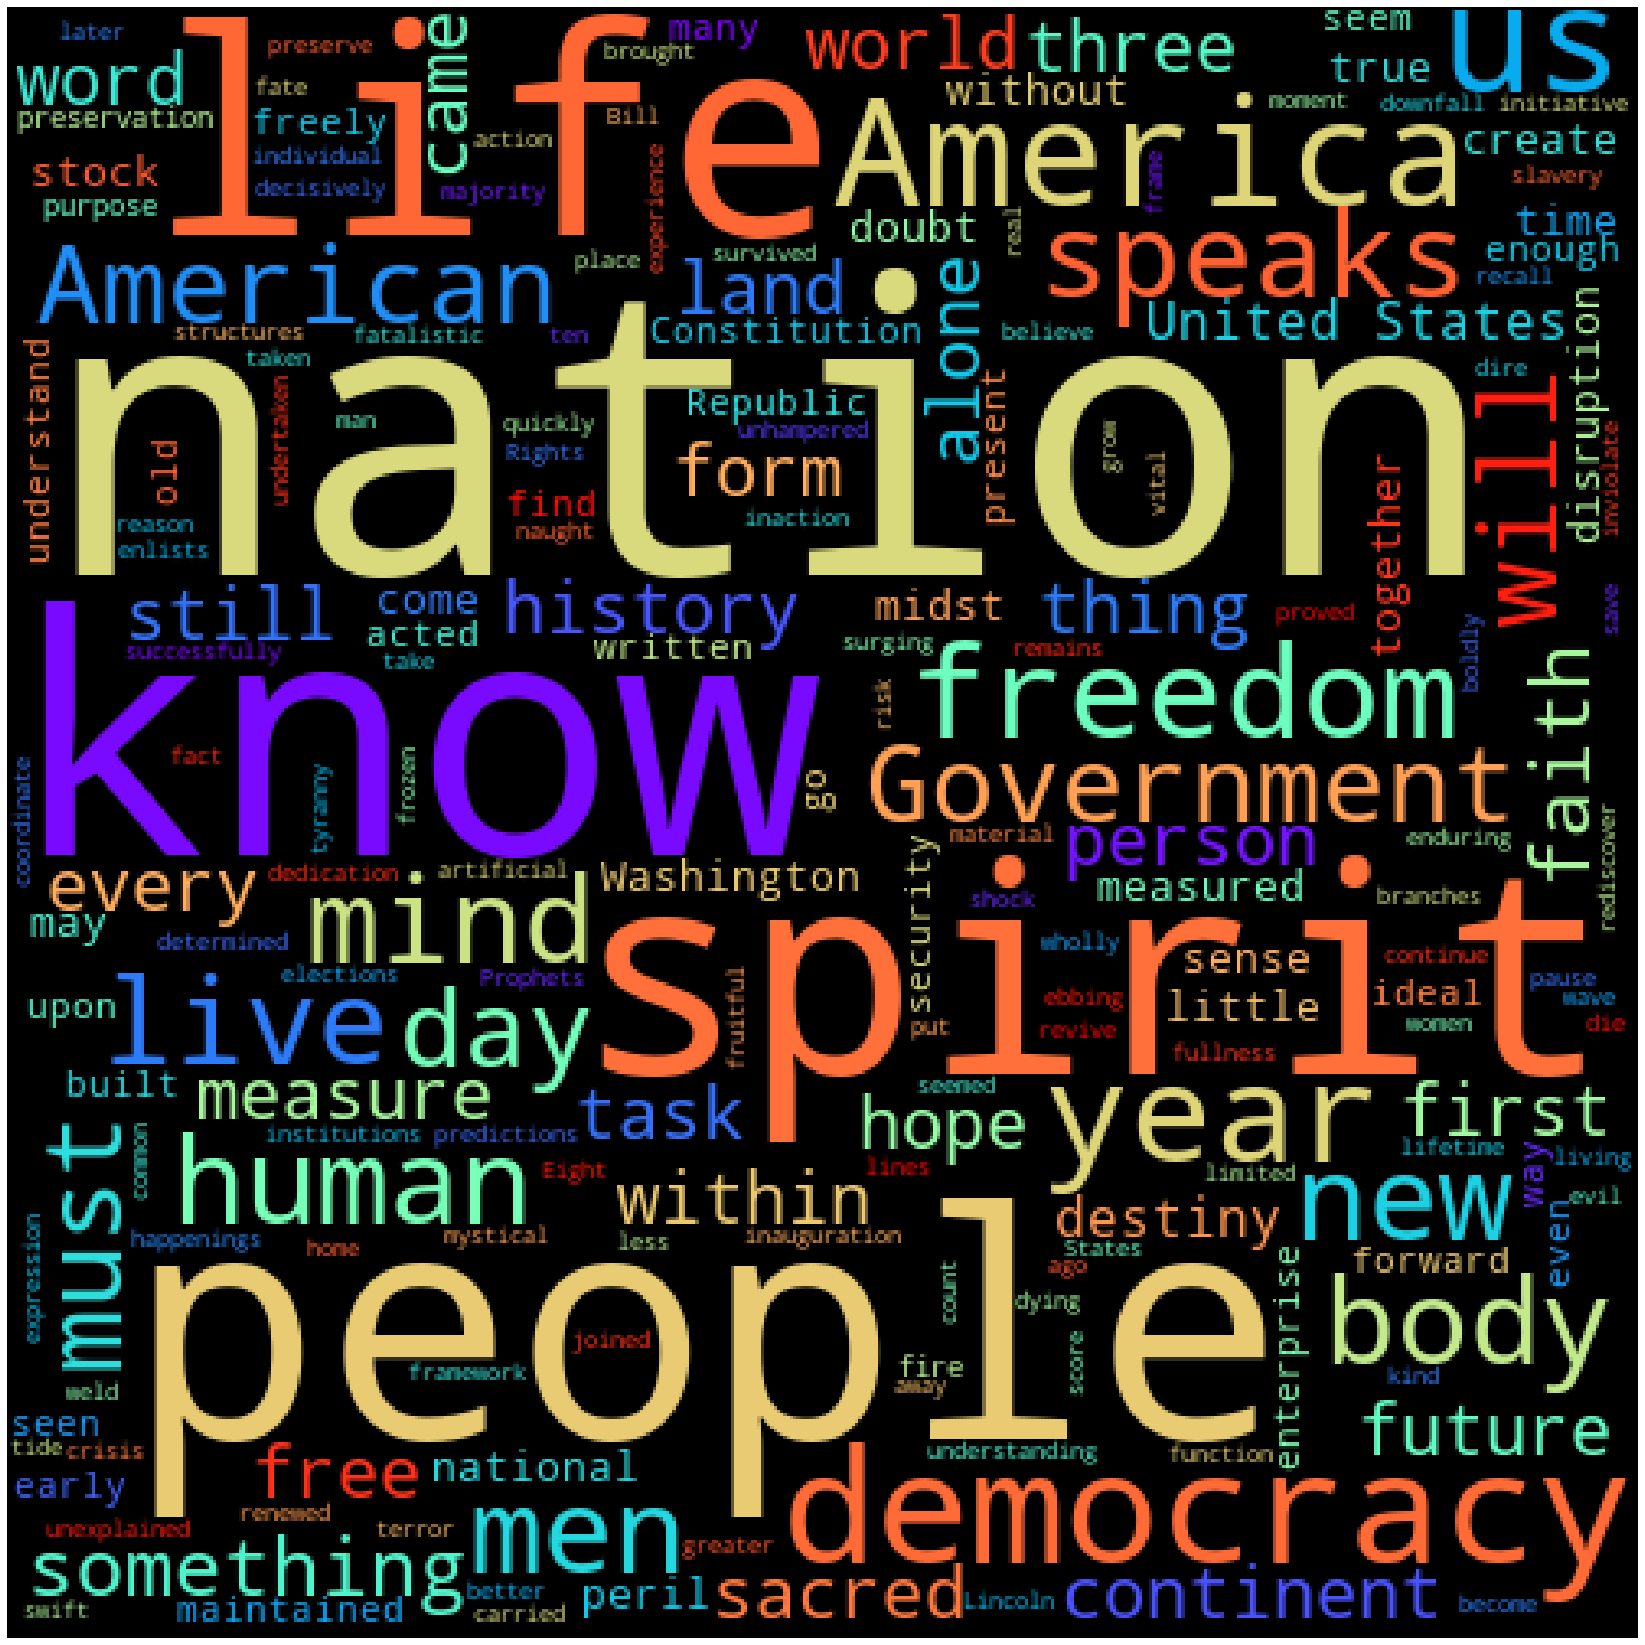

In [38]:
wordcloud = WordCloud(width = 500, height = 500,background_color='black', colormap='rainbow').generate(text)
plot_cloud(wordcloud)

In [39]:
text = inaugural.raw('1961-Kennedy.txt')
text = re.sub(r'==.*?==+, ', '', text)
text =text.replace('\n', '')

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off');

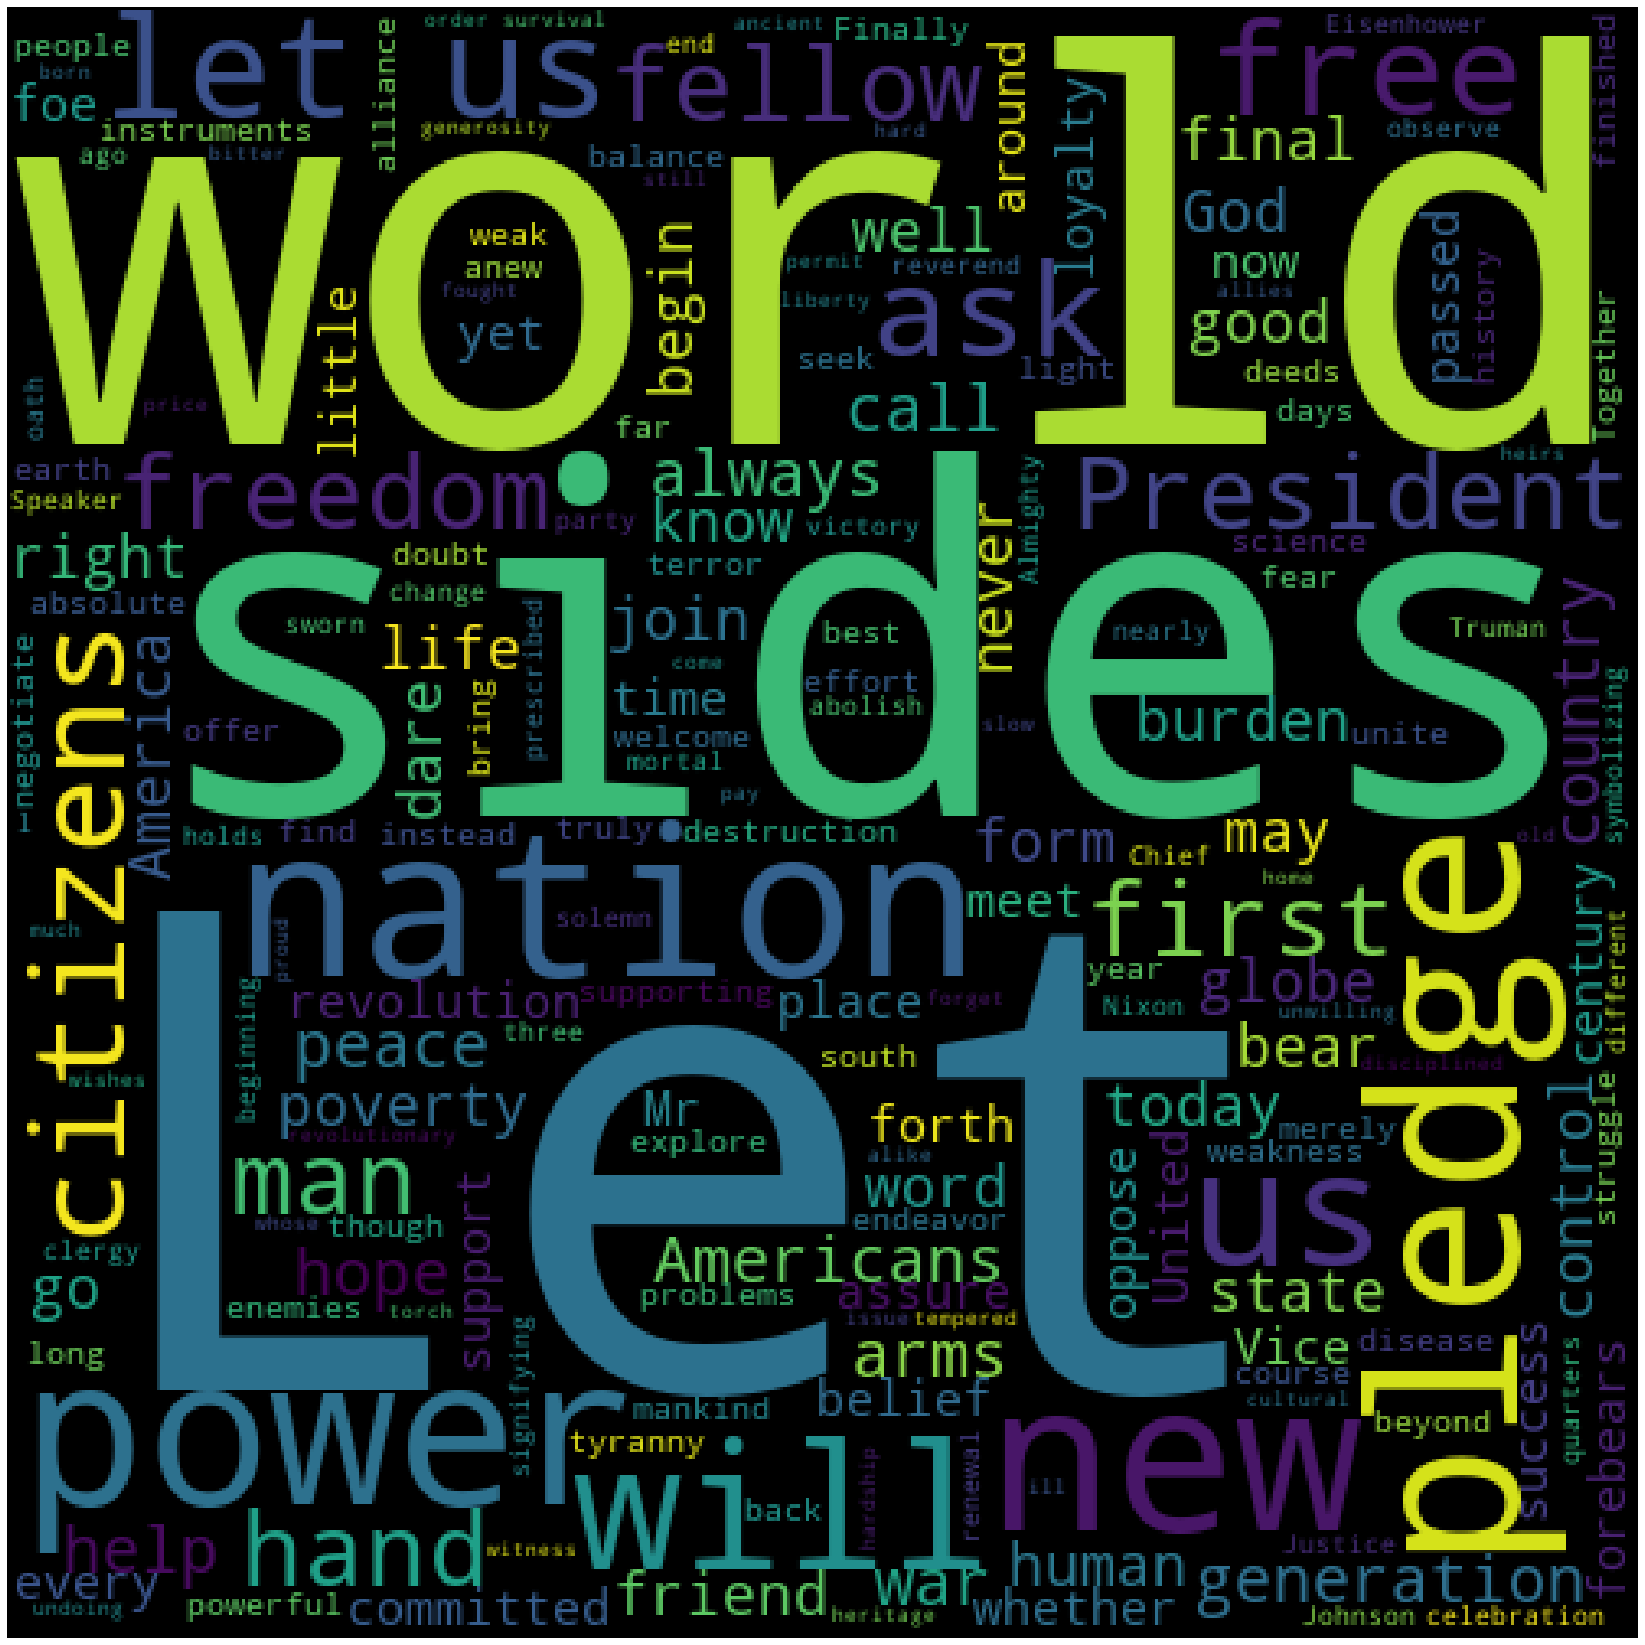

In [46]:
wordcloud = WordCloud(width = 500, height = 500,background_color='black', colormap='viridis').generate(text)
plot_cloud(wordcloud)

In [47]:
text = inaugural.raw('1973-Nixon.txt')
text = re.sub(r'==.*?==+, ', '', text)
text =text.replace('\n', '')

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off');

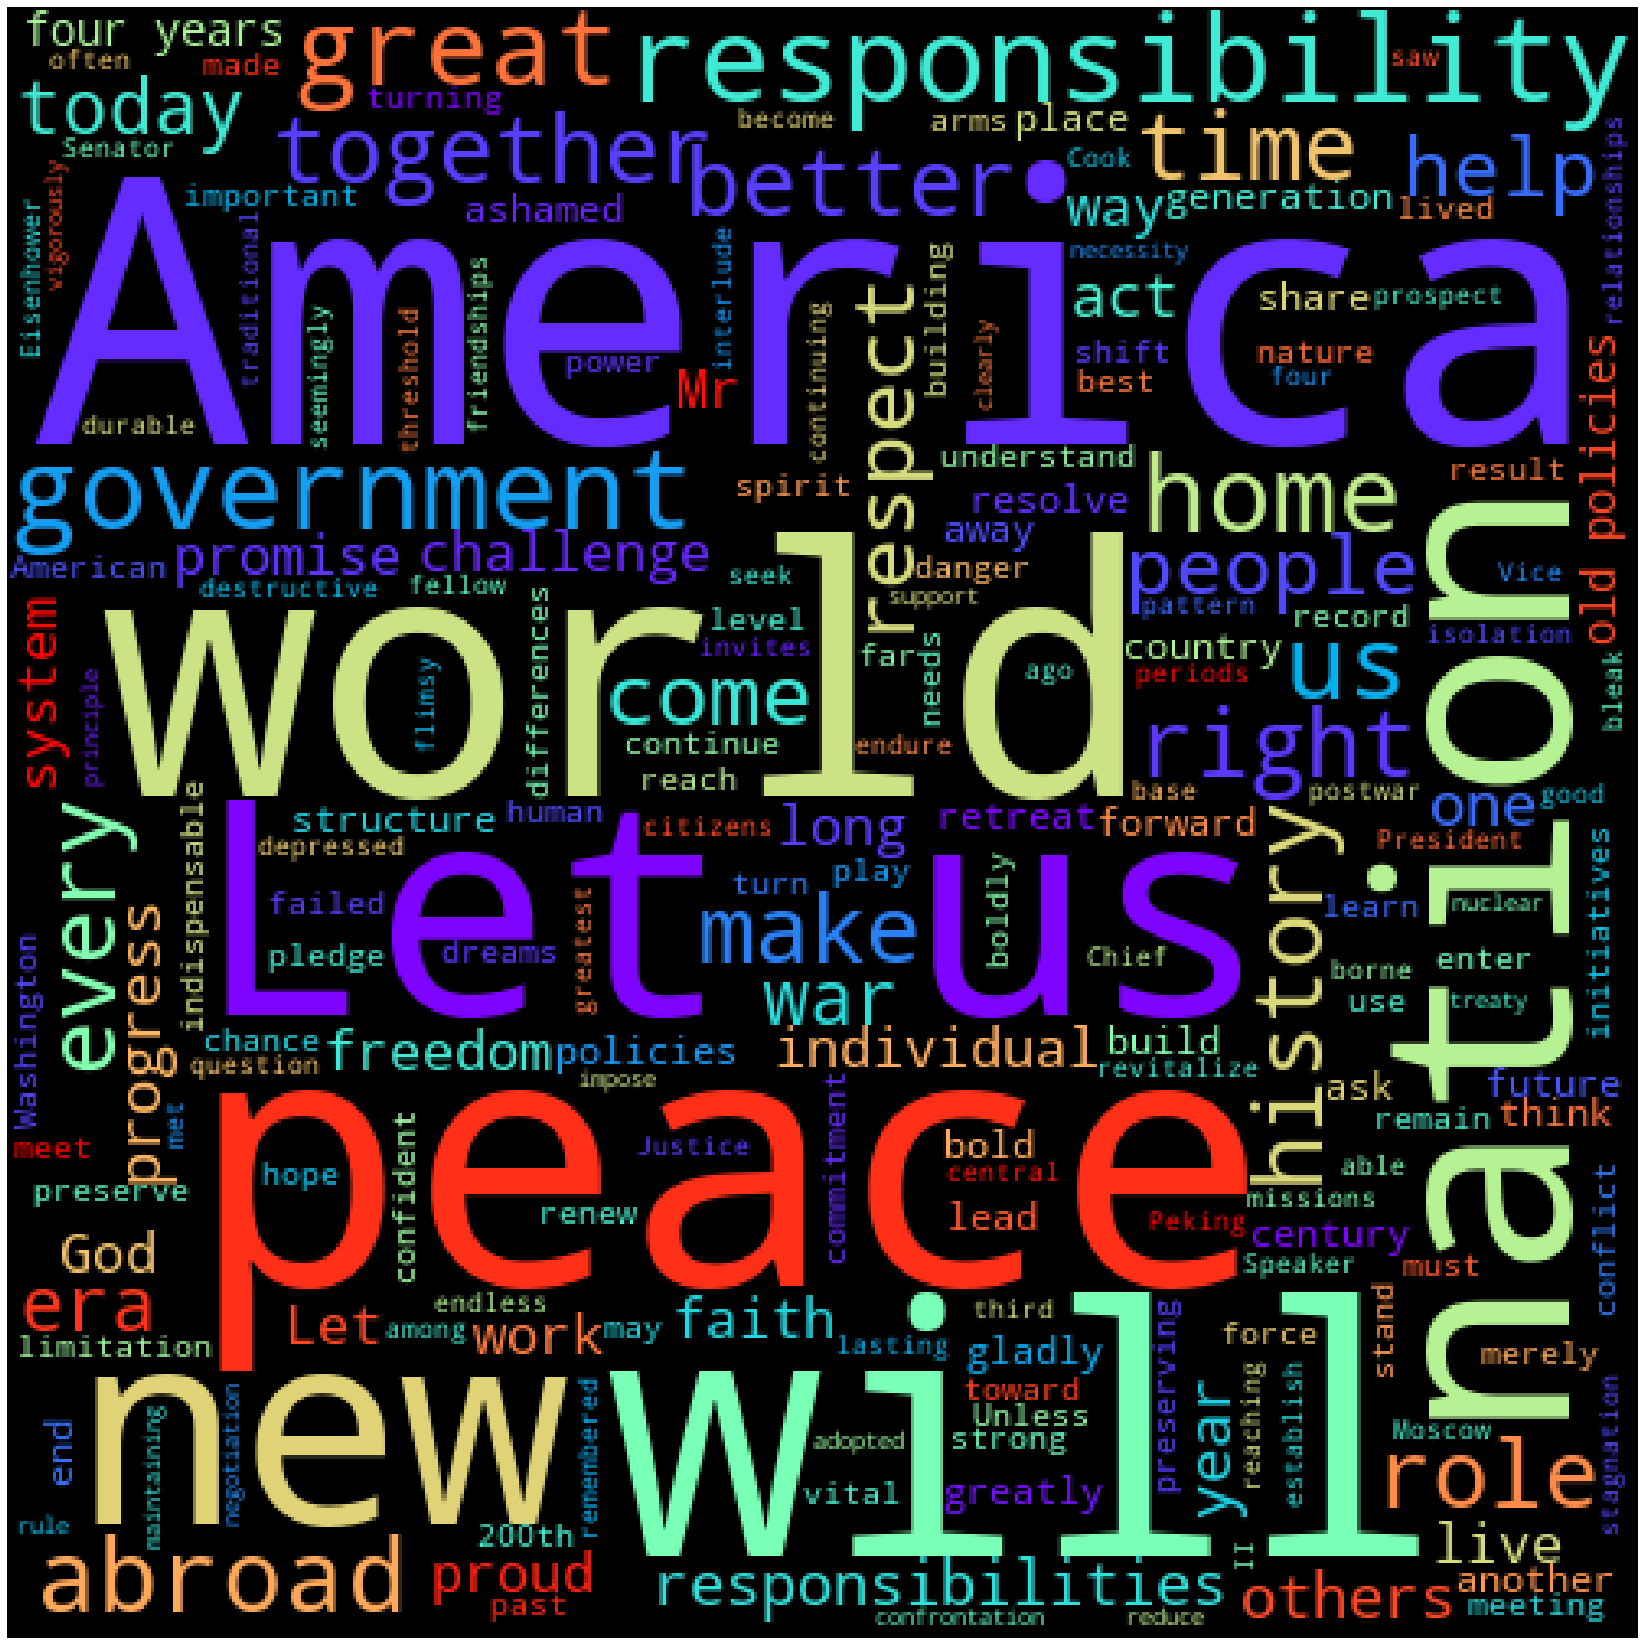

In [49]:
wordcloud = WordCloud(width = 500, height = 500,background_color='black', colormap='rainbow').generate(text)
plot_cloud(wordcloud)